In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error,r2_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df= pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.drop(columns=["species"],inplace=True)

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape


(147, 4)

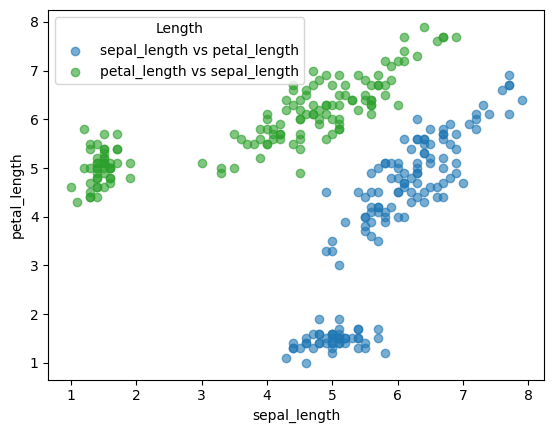

In [95]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, and it's already loaded
fig, ax = plt.subplots()

# Data
x = df["sepal_length"]
y = df["petal_length"]

# Define labels and colors
labels = ["sepal_length vs petal_length", "petal_length vs sepal_length"]
colors = ["tab:blue", "tab:green"]

# Loop to create scatter plots for different x-y pairs
for i, (xlabel, ylabel) in enumerate([(x, y), (y, x)]):
    ax.scatter(xlabel, ylabel, color=colors[i], label=labels[i], alpha=0.6)

# Add labels and legend
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
ax.legend(title="Length")

# Show the plot
plt.show()


In [51]:
from sklearn.cluster import KMeans
X=df.iloc[:,2:]
print(X)

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[147 rows x 2 columns]


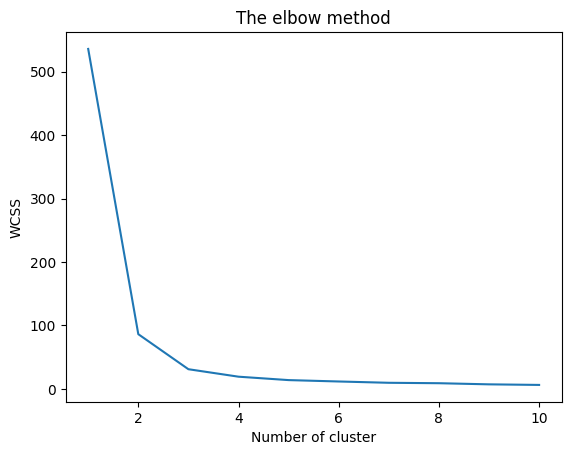

In [40]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=6)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [67]:
Kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_kmeans=Kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]


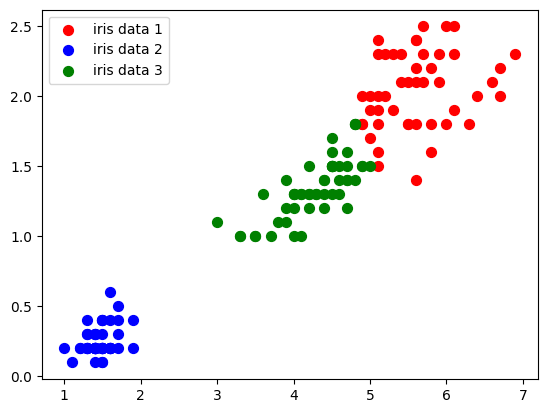

In [68]:
plt.scatter(X[y_kmeans==0]['petal_length'],X[y_kmeans==0]['petal_width'],s=50,c='red',label='iris data 1')
plt.scatter(X[y_kmeans==1]['petal_length'],X[y_kmeans==1]['petal_width'],s=50,c='blue',label='iris data 2')
plt.scatter(X[y_kmeans==2]['petal_length'],X[y_kmeans==2]['petal_width'],s=50,c='green',label='iris data 3')
plt.legend()

In [71]:
from sklearn.metrics import silhouette_score



In [74]:
score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6588072147904505


In [81]:
Y=df.iloc[:,:2]
print(Y)

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[147 rows x 2 columns]


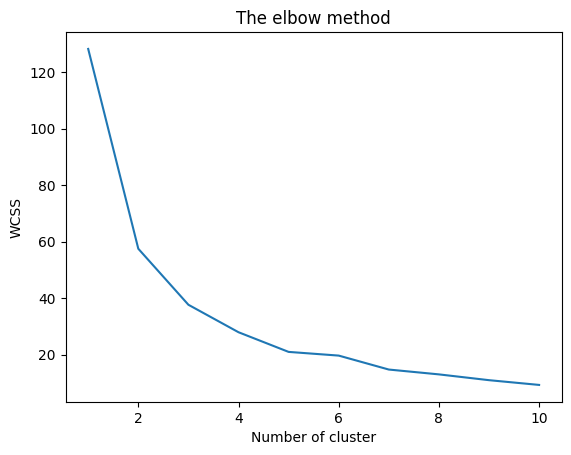

In [82]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=6)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [88]:
Kmeans=KMeans(n_clusters=7,init='k-means++',random_state=1)
y_kmeans=Kmeans.fit_predict(Y)
print(y_kmeans)

[1 2 2 2 1 6 2 1 2 2 1 1 2 2 6 6 6 1 6 1 1 1 1 1 1 2 1 1 1 2 2 1 6 6 1 1 2
 1 1 2 2 1 1 2 1 2 1 1 3 0 3 4 0 4 0 2 0 4 4 0 4 0 4 3 4 4 4 4 0 0 0 0 0 0
 3 3 0 4 4 4 4 0 4 0 3 0 4 4 4 0 4 4 4 4 4 0 4 4 0 4 3 0 0 3 2 3 0 3 0 0 3
 4 4 0 0 5 3 4 3 4 3 0 3 3 0 0 0 3 3 5 0 0 0 3 0 0 0 3 3 3 3 3 3 0 0 0 0]


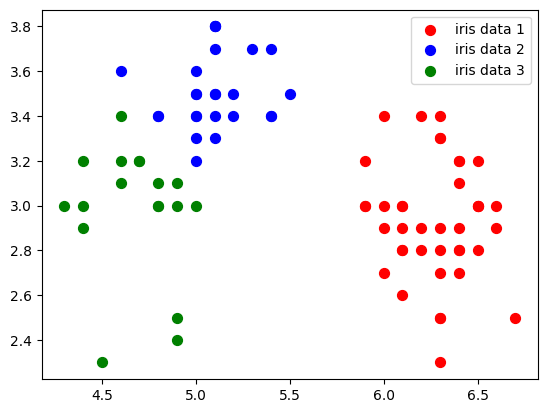

In [89]:
plt.scatter(Y[y_kmeans==0]['sepal_length'],Y[y_kmeans==0]['sepal_width'],s=50,c='red',label='iris data 1')
plt.scatter(Y[y_kmeans==1]['sepal_length'],Y[y_kmeans==1]['sepal_width'],s=50,c='blue',label='iris data 2')
plt.scatter(Y[y_kmeans==2]['sepal_length'],Y[y_kmeans==2]['sepal_width'],s=50,c='green',label='iris data 3')
plt.legend()

In [85]:
score = silhouette_score(Y, y_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4403009946012769
